In [1]:
import os
import warnings
import pandas as pd
import networkx as nx
import matplotlib as mpl
from empiricaldist import Cdf
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from bokeh.plotting import figure
import matplotlib.colors as mcolors
from utils import decorate, savefig
from bokeh.transform import linear_cmap
from bokeh.plotting import from_networkx
from bokeh.io import output_notebook, show, save
from networkx.drawing.nx_agraph import graphviz_layout
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8,Inferno
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, ColorBar, LabelSet, LogColorMapper

## Ahmedabad

In [2]:
#caricamento network
edgelist = pd.read_csv("abn.txt",sep="	")
edgelist=edgelist.drop(['Unnamed: 3'], axis=1)
#network pesata
G_pesato = nx.from_pandas_edgelist(edgelist, create_using=nx.Graph(), source="Source", target="Target", edge_attr=["Weight"])
#network non pesata
G_non_pesato = nx.from_pandas_edgelist(edgelist, create_using=nx.Graph(), source="Source", target="Target", edge_attr=None)
#lista di nodi
nodi= edgelist["Source"].unique()
df_nodi= pd.DataFrame(nodi)
df_nodi=df_nodi.rename(columns={0:"id"})
#creazione data frame network
data = df_nodi.set_index('id').to_dict('index').items()
G_non_pesato.add_nodes_from(data)
G_pesato.add_nodes_from(data)
print('NODI:\n',len(G_pesato.nodes))
print('\nLINKS:\n',len(G_pesato.edges))

NODI:
 1103

LINKS:
 2157


# Matrice di Adiacenza

In [3]:
nodelist = list(G_pesato.nodes)
mat_adj = nx.to_pandas_adjacency(G_pesato, dtype=int)
mat_adj

Lal.Darwaja  Bhadra  Khamasa  Nehru.Bridge  \
Lal.Darwaja                          0       1        1             1   
Bhadra                               1       0        0             0   
Khamasa                              1       0        0             1   
Nehru.Bridge                         1       0        1             0   
Delhi.Darwaja                        1       0        0             0   
...                                ...     ...      ...           ...   
Kali.Gam                             0       0        0             0   
Digvijay.Nagar                       0       0        0             0   
Sabarmati.Railway.Station            0       0        0             0   
Gram.Swaraj.Ashram                   0       0        0             0   
Nikol.Gam                            0       0        0             0   

                           Delhi.Darwaja  Jansatta.Office  Vasna.Terminus  \
Lal.Darwaja                            1                1               1   
Bhadra                                 0                0               0   
Khamasa                                0                0               0   
Nehru.Bridge                           0                0               0   
Delhi.Darwaja                          0                1               0   
...                                  ...              ...             ...   
Kali.Gam                               0                0               0   
Digvijay.Nagar                         0                0               0   
Sabarmati.Railway.Station              0                0               0   
Gram.Swaraj.Ashram                     0                0               0   
Nikol.Gam                              0                0               0   

                           Sardarbag  Khanpur  relief.Road  ...  \
Lal.Darwaja                        1        1            1  ...   
Bhadra                             0        0            0  ...   
Khamasa                            0        0            0  ...   
Nehru.Bridge                       1        0            0  ...   
Delhi.Darwaja                      0        0            0  ...   
...                              ...      ...          ...  ...   
Kali.Gam                           0        0            0  ...   
Digvijay.Nagar                     0        0            0  ...   
Sabarmati.Railway.Station          0        0            0  ...   
Gram.Swaraj.Ashram                 0        0            0  ...   
Nikol.Gam                          0        0            0  ...   

                           Andh.Kalyan.Kendra  Green.Avenue  Essar.Steel  \
Lal.Darwaja                                 0             0            0   
Bhadra                                      0             0            0   
Khamasa                                     0             0            0   
Nehru.Bridge                                0             0            0   
Delhi.Darwaja                               0             0            0   
...                                       ...           ...          ...   
Kali.Gam                                    0             0            0   
Digvijay.Nagar                              0             0            0   
Sabarmati.Railway.Station                   0             0            0   
Gram.Swaraj.Ashram                          0             0            0   
Nikol.Gam                                   0             0            0   

                           Aksharpark.Society  Chenpur.Gam  Kali.Gam  \
Lal.Darwaja                                 0            0         0   
Bhadra                                      0            0         0   
Khamasa                                     0            0         0   
Nehru.Bridge                                0            0         0   
Delhi.Darwaja                               0            0         0   
...                                       ...          ...       ...   
Kal

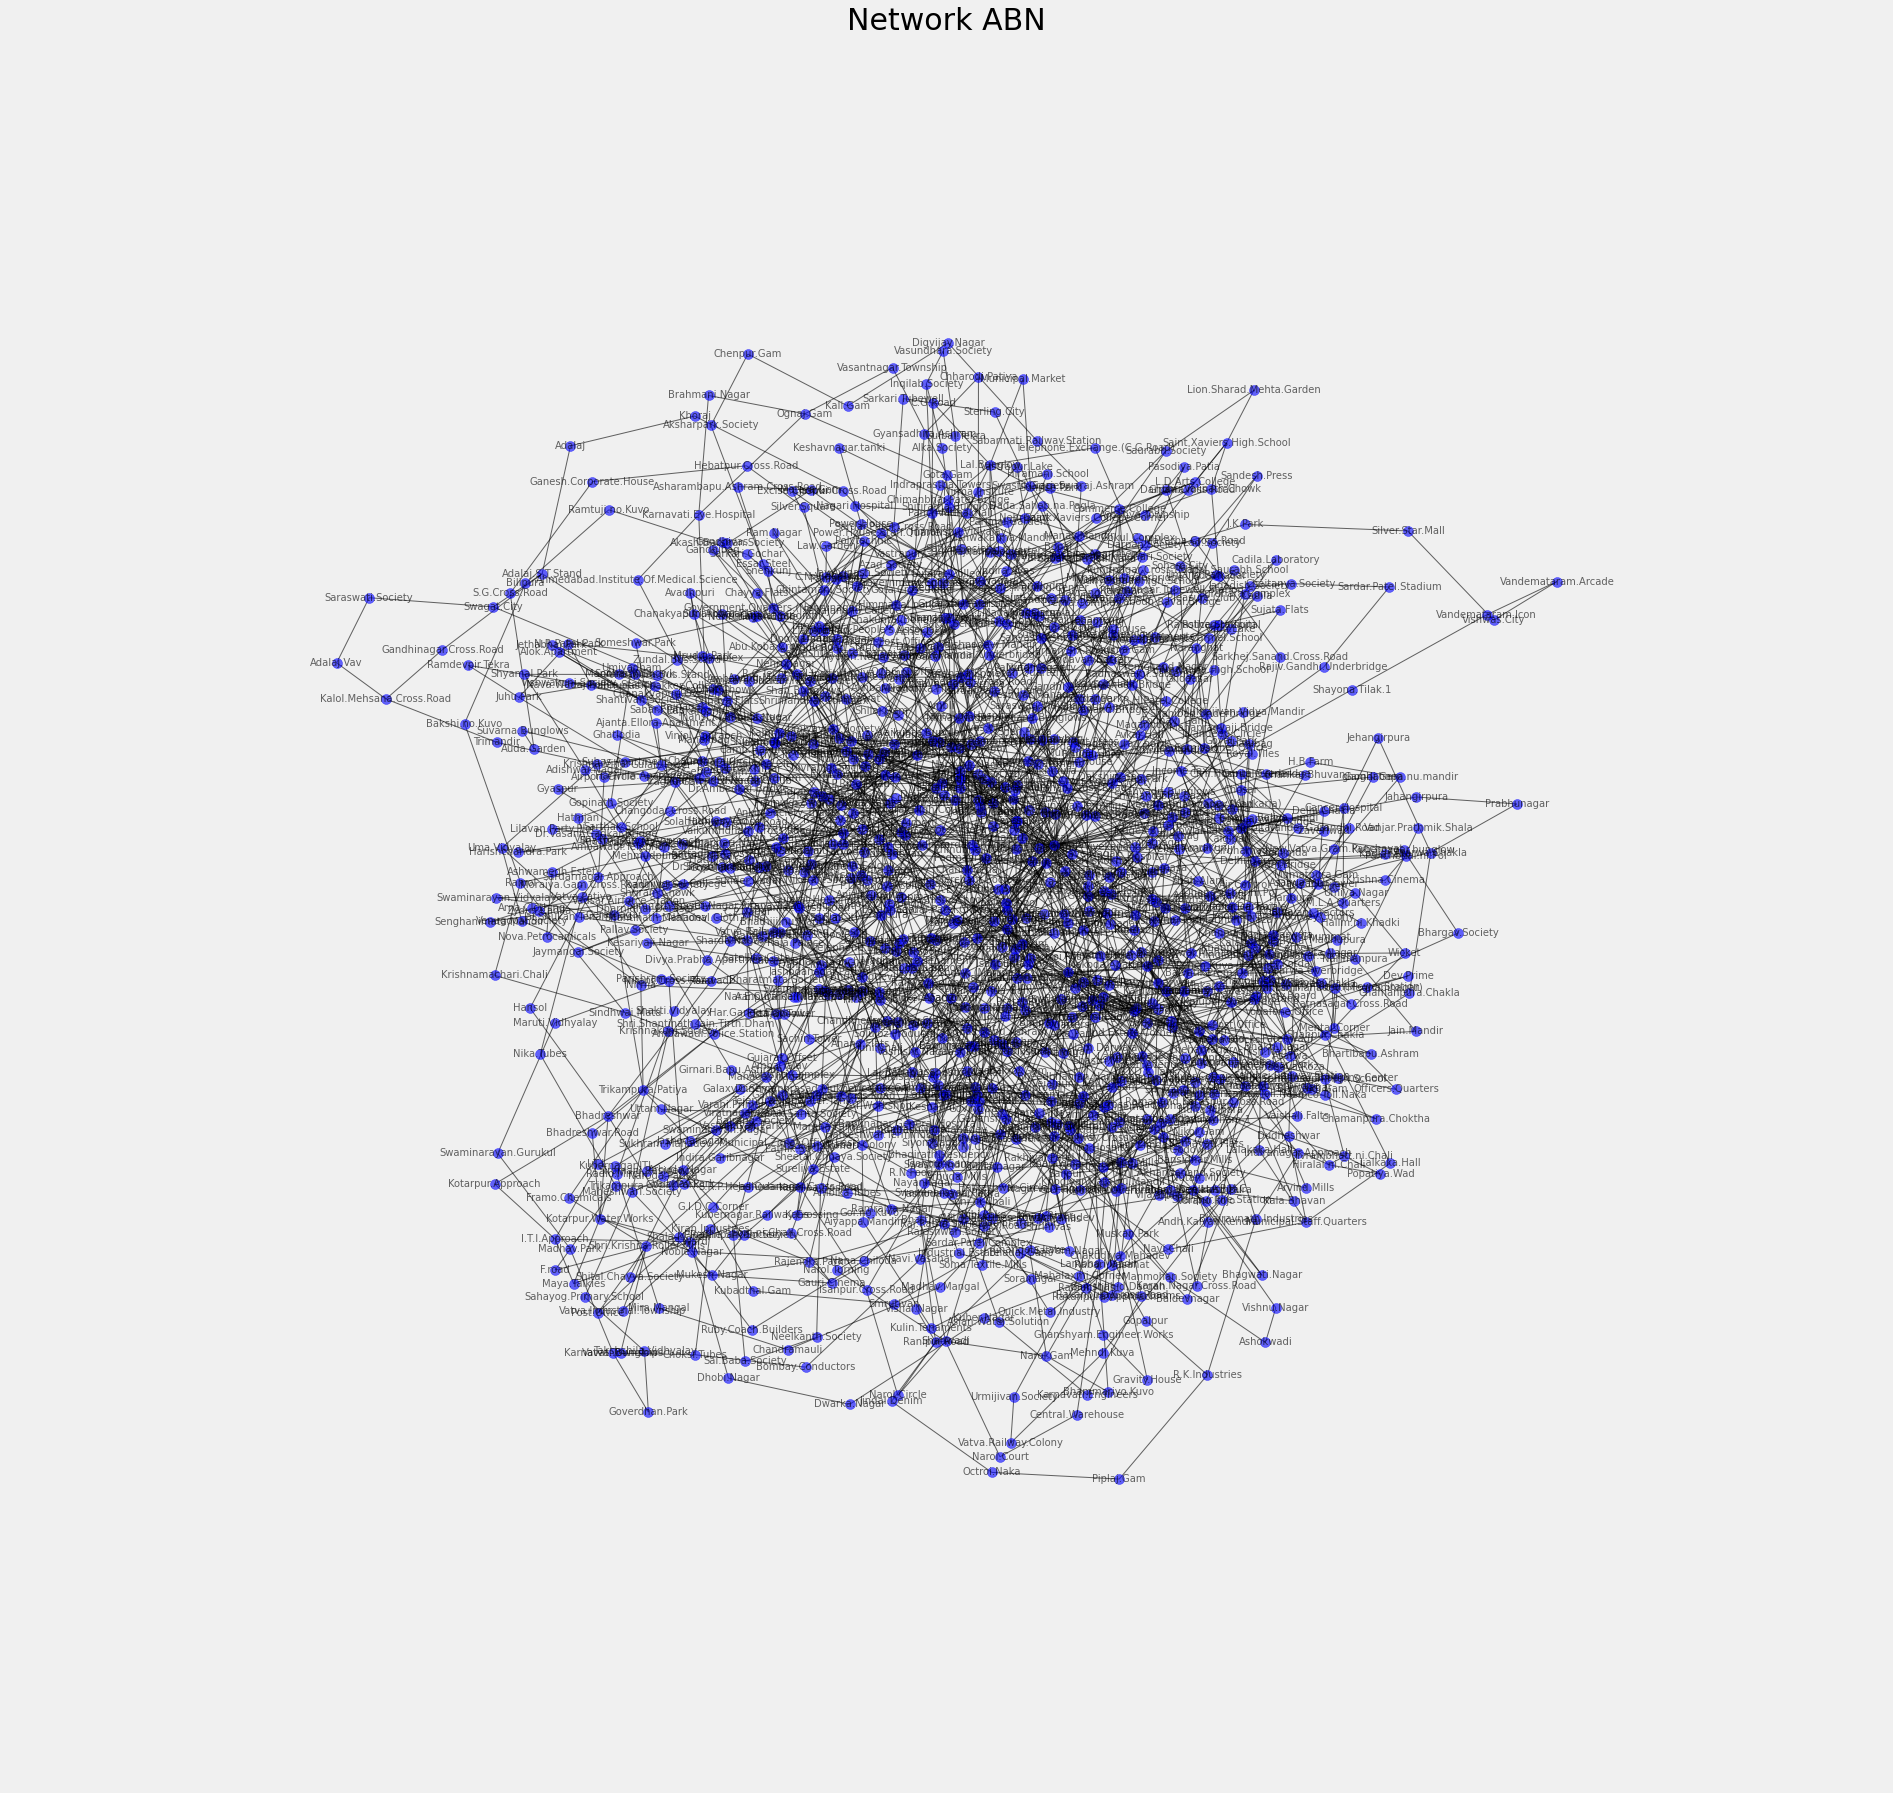

In [75]:
pos = nx.spring_layout(G_pesato, k=0.1)
plt.rcParams["figure.figsize"] = (30,30)
nx.draw_networkx(G_pesato, pos=pos, node_size=100, edge_color="black", alpha=0.6, with_labels=True,
                node_color="blue",font_size=10,font_color="black")
plt.title("Network ABN", fontsize=30)
ax = plt.gca()
ax.margins(0.20)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis("off")

plt.show()

## Large scale

In [3]:
#La rete è connesssa?
print('\nNetwork is connected?\n',nx.is_connected(G_pesato))                          
comps = sorted(nx.connected_components(G_pesato),
               key=len, reverse=True)



Network is connected?
 True


In [4]:
#average path length
apl=[]
apl.append((round(nx.average_shortest_path_length(G_non_pesato),3)))
apl.append((round(nx.average_shortest_path_length(G_pesato, weight="Weight"),3)))
df=pd.DataFrame([apl],columns=["Network non pesata","Network pesata"])
#diametro
diametro=[]
diametro.append(nx.diameter(G_non_pesato))
diametro.append(nx.diameter(G_pesato))
df_length = len(df)
df.loc[df_length] = diametro
#density
density=[]
density.append(round(nx.density(G_non_pesato),4))
density.append(round(nx.density(G_pesato),4))
df_length = len(df)
df.loc[df_length] = density
# average local clustering
alc=[]
alc.append(round(nx.average_clustering(G_non_pesato),4))
alc.append(round(nx.average_clustering(G_pesato,weight='Weight'),4))
df_length = len(df)
df.loc[df_length] = alc
#global clustering
global_clustering=[]
global_clustering.append(round(nx.transitivity(G_non_pesato),3))
global_clustering.append(round(nx.transitivity(G_pesato),3))
df_length = len(df)
df.loc[df_length] = global_clustering
indici=["Average Path Length","Diametro","Density","Average Local Clustering","Global Clustering"]
df.index =indici
df


Network non pesata  Network pesata
Average Path Length                   5.5930          6.4630
Diametro                             16.0000         16.0000
Density                               0.0035          0.0035
Average Local Clustering              0.1891          0.0154
Global Clustering                     0.1270          0.1270

## Small scale

In [5]:
#calcolo del grado per la network pesata e non pesata
nx.set_node_attributes(G_non_pesato, name='unweighted_degree', values=dict(nx.degree(G_non_pesato)))
nx.set_node_attributes(G_pesato, name='unweighted_degree', values=dict(nx.degree(G_pesato)))
nx.set_node_attributes(G_pesato, name='weighted_degree', values=dict(nx.degree(G_pesato, weight='Weight')))

#calcolo degree centrality
nx.set_node_attributes(G_non_pesato, name='degree_centrality', values=nx.degree_centrality(G_non_pesato))
nx.set_node_attributes(G_pesato, name='degree_centrality', values=nx.degree_centrality(G_pesato))

#calcolo betweeness centrality
nx.set_node_attributes(G_non_pesato, name='betweenness', values=nx.betweenness_centrality(G_non_pesato, normalized=True))
nx.set_node_attributes(G_pesato, name='betweenness', values=nx.betweenness_centrality(G_pesato, normalized=True, weight="Weight"))

#calcolo closeness
nx.set_node_attributes(G_non_pesato, name='closeness', values=nx.closeness_centrality(G_non_pesato))
nx.set_node_attributes(G_pesato, name='closeness', values=nx.closeness_centrality(G_pesato))

#calcolo eigenvector
nx.set_node_attributes(G_non_pesato, name='eigenvector', values=nx.eigenvector_centrality(G_non_pesato))
nx.set_node_attributes(G_pesato, name='eigenvector', values=nx.eigenvector_centrality(G_pesato, weight="Weight"))

#calcolo page rank
nx.set_node_attributes(G_non_pesato, name='page_rank', values=nx.pagerank(G_non_pesato))
nx.set_node_attributes(G_pesato, name='page_rank', values=nx.pagerank(G_pesato, weight="Weight"))

In [6]:
#creazione del data frame con le varie misure small scale per la rete non pesata
unweightedDF = pd.DataFrame(dict(G_non_pesato.nodes(data=True))).T
unweightedDF

unweighted_degree  degree_centrality  betweenness  \
Lal.Darwaja                             54.0           0.049002     0.418216   
Bhadra                                   2.0           0.001815     0.001279   
Khamasa                                  9.0           0.008167     0.015007   
Nehru.Bridge                            10.0           0.009074     0.011442   
Delhi.Darwaja                           18.0           0.016334     0.036004   
...                                      ...                ...          ...   
Kali.Gam                                 2.0           0.001815     0.001577   
Digvijay.Nagar                           2.0           0.001815     0.003302   
Sabarmati.Railway.Station                2.0           0.001815     0.005079   
Gram.Swaraj.Ashram                       2.0           0.001815     0.006869   
Nikol.Gam                                2.0           0.001815     0.001009   

                           closeness  eigenvector  page_rank  
Lal.Darwaja                 0.313246     0.466651   0.010160  
Bhadra                      0.238890     0.051753   0.000520  
Khamasa                     0.247975     0.094881   0.001588  
Nehru.Bridge                0.244726     0.094214   0.001693  
Delhi.Darwaja               0.253800     0.163522   0.003190  
...                              ...          ...        ...  
Kali.Gam                    0.116429     0.000004   0.000847  
Digvijay.Nagar              0.131066     0.000034   0.000813  
Sabarmati.Railway.Station   0.150362     0.000306   0.000746  
Gram.Swaraj.Ashram          0.176518     0.002792   0.000619  
Nikol.Gam                   0.197420     0.017866   0.000509  

[1103 rows x 6 columns]

In [7]:
#creazione del data frame con le varie misure small scale per la rete pesata
weightedDF = pd.DataFrame(dict(G_pesato.nodes(data=True))).T
weightedDF

unweighted_degree  weighted_degree  \
Lal.Darwaja                             54.0             86.0   
Bhadra                                   2.0              2.0   
Khamasa                                  9.0             42.0   
Nehru.Bridge                            10.0             42.0   
Delhi.Darwaja                           18.0             73.0   
...                                      ...              ...   
Kali.Gam                                 2.0              2.0   
Digvijay.Nagar                           2.0              2.0   
Sabarmati.Railway.Station                2.0              2.0   
Gram.Swaraj.Ashram                       2.0              2.0   
Nikol.Gam                                2.0              2.0   

                           degree_centrality  betweenness  closeness  \
Lal.Darwaja                         0.049002     0.351534   0.313246   
Bhadra                              0.001815     0.001804   0.238890   
Khamasa                             0.008167     0.006516   0.247975   
Nehru.Bridge                        0.009074     0.002617   0.244726   
Delhi.Darwaja                       0.016334     0.021368   0.253800   
...                                      ...          ...        ...   
Kali.Gam                            0.001815     0.000986   0.116429   
Digvijay.Nagar                      0.001815     0.002582   0.131066   
Sabarmati.Railway.Station           0.001815     0.004343   0.150362   
Gram.Swaraj.Ashram                  0.001815     0.006127   0.176518   
Nikol.Gam                           0.001815     0.000938   0.197420   

                            eigenvector  page_rank  
Lal.Darwaja                1.922399e-01   0.010366  
Bhadra                     5.769737e-03   0.000425  
Khamasa                    2.589975e-01   0.003780  
Nehru.Bridge               9.745115e-02   0.003649  
Delhi.Darwaja              1.844086e-01   0.005687  
...                                 ...        ...  
Kali.Gam                   6.512873e-09   0.000829  
Digvijay.Nagar             2.173703e-07   0.000783  
Sabarmati.Railway.Station  7.256087e-06   0.000691  
Gram.Swaraj.Ashram         2.422526e-04   0.000522  
Nikol.Gam                  3.212349e-03   0.000419  

[1103 rows x 7 columns]

# Degree

In [8]:
topNodes = 15
unweightedDF["Label"]=unweightedDF.index
weightedDF["Label"]=weightedDF.index

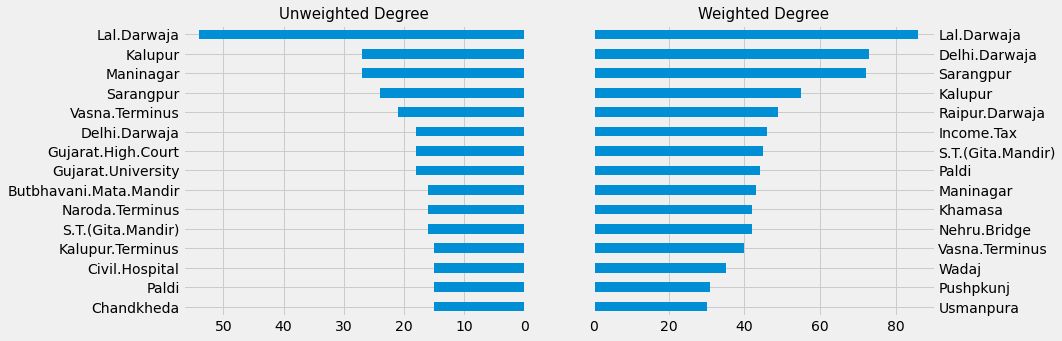

In [10]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))
plt.style.use('fivethirtyeight')


unweightedDF.sort_values(by='unweighted_degree', ascending=False)[:topNodes].plot(x='Label', y='unweighted_degree', kind='barh', ax=ax, legend=False).invert_yaxis()
ax.set_title("Unweighted Degree", fontsize=15)
ax.invert_xaxis()
ax.set_ylabel("")


weightedDF.sort_values(by='weighted_degree', ascending=False)[:topNodes].plot(x='Label', y='weighted_degree', kind='barh', ax=ax2, legend=False).invert_yaxis()
ax2.set_title("Weighted Degree", fontsize=15)
ax2.yaxis.tick_right()
ax2.set_ylabel("")


plt.show()

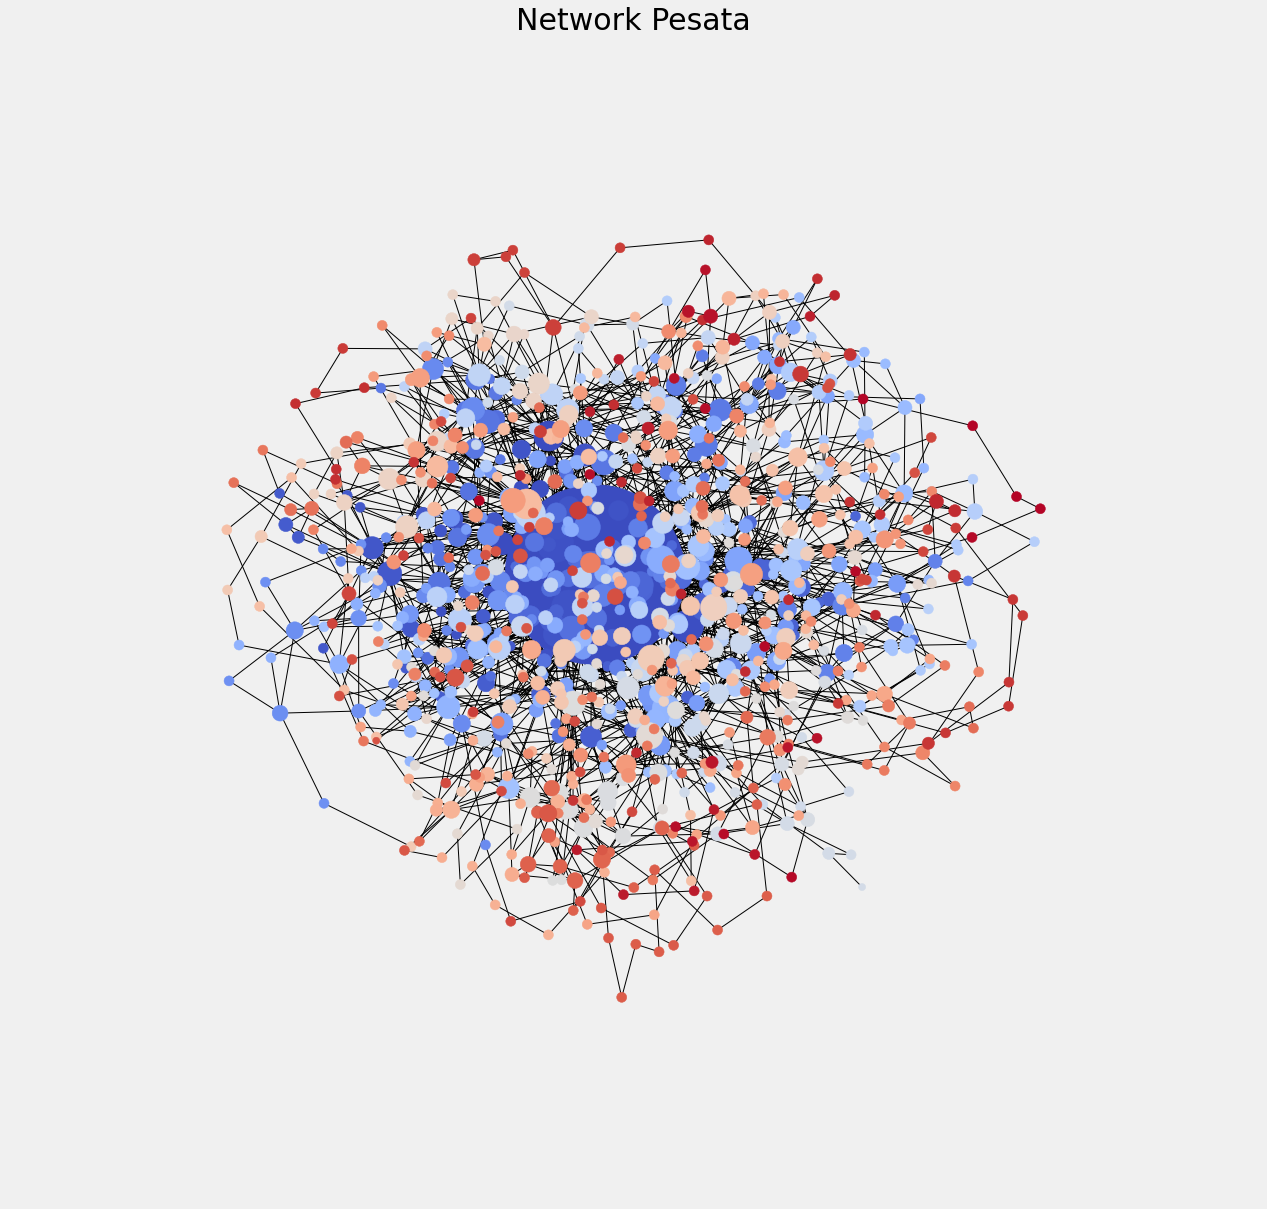

In [11]:
pos = nx.spring_layout(G_pesato, k=0.1)
color_lookup = {k:v for v, k in enumerate(sorted(set(G_pesato.nodes())))}
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
node_colors = [mapper.to_rgba(i) for i in color_lookup.values()]
d = dict(list(nx.degree(G_pesato)))
node_sizes = [v*50 if v <= 30 else v*600 for v in d.values()]
plt.rcParams["figure.figsize"] = (20,20)
nx.draw_networkx(G_pesato, pos=pos, node_size=node_sizes, node_color=node_colors, edge_color="black", with_labels=False, font_size=12)
plt.title("Network Pesata", fontsize=30)
ax = plt.gca()
ax.margins(0.20)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.axis("off")

plt.show()

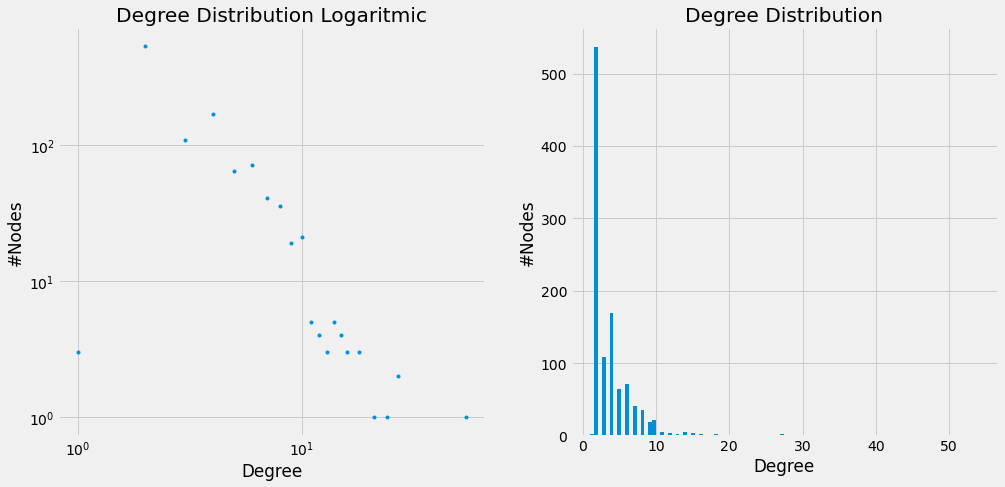

In [12]:
hist = nx.degree_histogram(G_pesato)

plt.rcParams["figure.figsize"] = (15,7)

plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist)), hist,'.')

plt.title("Degree Distribution Logaritmic")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

degree_sequence = [G_pesato.degree(n) for n in G_pesato.nodes]

plt.subplot(1, 2, 2)
counts, bins, patches = plt.hist(degree_sequence,bins=100)

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

In [13]:
#creazione di un dataframe per una visualizzazione più rapida dei vari gradi e le relative frequenze
degree_counts = Counter(degree_sequence)
sorted_degree = sorted(degree_counts.items(), 
                       key=lambda item: item[1],reverse=True)
list_gradi=[]
conteggi=[]
for i in range(len(sorted_degree)):
    list_gradi.append(sorted_degree[i][0])
    conteggi.append(sorted_degree[i][1])
df_conteggi=pd.DataFrame(list_gradi,columns=["Grado"])
df_conteggi['Frequenze']=conteggi
df_conteggi


Grado  Frequenze
0       2        537
1       4        169
2       3        109
3       6         71
4       5         65
5       7         41
6       8         36
7      10         21
8       9         19
9      14          5
10     11          5
11     15          4
12     12          4
13     18          3
14     16          3
15     13          3
16      1          3
17     27          2
18     54          1
19     21          1
20     24          1

# Degree Centrality

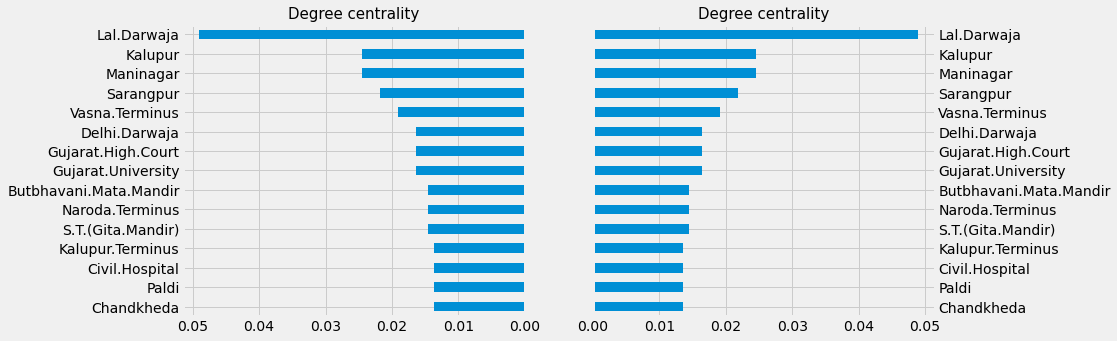

In [14]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))
plt.style.use('fivethirtyeight')


unweightedDF.sort_values(by='degree_centrality', ascending=False)[:topNodes].plot(x='Label', y='degree_centrality', kind='barh', ax=ax, legend=False).invert_yaxis()
ax.set_title("Degree centrality", fontsize=15)
ax.invert_xaxis()
ax.set_ylabel("")


weightedDF.sort_values(by='degree_centrality', ascending=False)[:topNodes].plot(x='Label', y='degree_centrality', kind='barh', ax=ax2, legend=False).invert_yaxis()
ax2.set_title("Degree centrality", fontsize=15)
ax2.yaxis.tick_right()
ax2.set_ylabel("")


plt.show()

In [15]:
if not os.path.isdir('img_abn'):
    os.mkdir('img_abn')
title = 'Degree centrality'
adjusted_node_size = dict([(node, 5+degree*175) for node, degree in nx.degree_centrality(G_pesato).items()])
nx.set_node_attributes(G_non_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("degree_centrality","@degree_centrality")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_non_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.degree_centrality(G_pesato).values()), high=max(nx.degree_centrality(G_pesato).values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")


save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Degree centrality.html'

# Betweenness

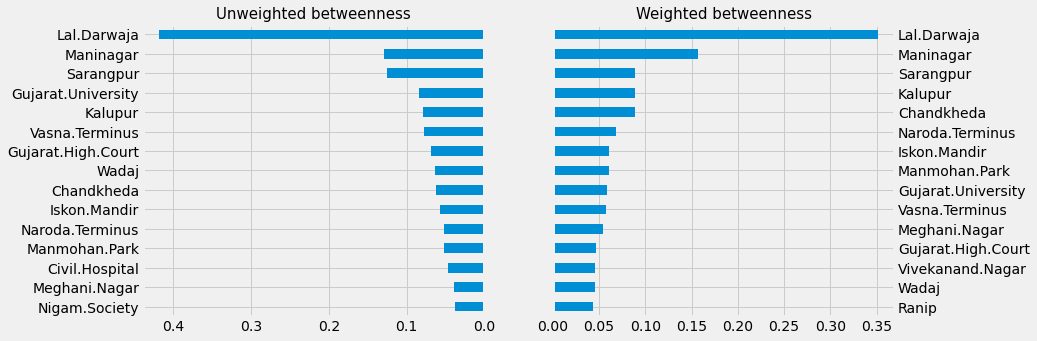

In [16]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))
plt.style.use('fivethirtyeight')

unweightedDF.sort_values(by='betweenness', ascending=False)[:topNodes].plot(x='Label', y='betweenness', kind='barh', ax=ax, legend=False).invert_yaxis()
ax.set_title("Unweighted betweenness", fontsize=15)
ax.invert_xaxis()
ax.set_ylabel("")


weightedDF.sort_values(by='betweenness', ascending=False)[:topNodes].plot(x='Label', y='betweenness', kind='barh', ax=ax2, legend=False).invert_yaxis()
ax2.set_title("Weighted betweenness", fontsize=15)
ax2.yaxis.tick_right()
ax2.set_ylabel("")


plt.show()

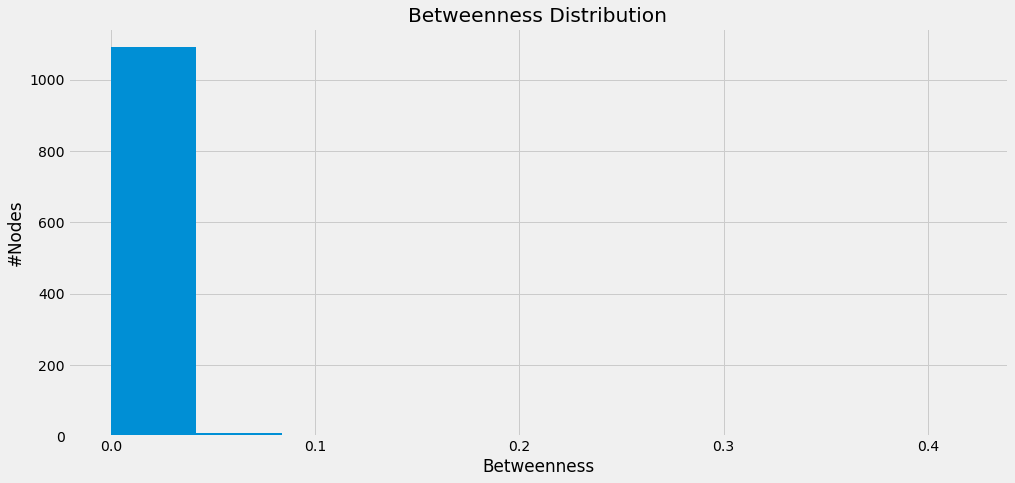

In [17]:
#grafico della distribuzione di frequenze per la betweenness
B = nx.betweenness_centrality(G_pesato,normalized=True)
betweenness_sequence = list(B.values())

counts, bins, patches = plt.hist(betweenness_sequence,bins=10)
plt.title("Betweenness Distribution")
plt.xlabel("Betweenness")
plt.ylabel("#Nodes")
plt.show()

In [18]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Weighted betweenness'
adjusted_node_size = dict([(node, 5+betweenness*175) for node, betweenness in nx.betweenness_centrality(G_pesato, normalized=True, weight="Weight").items()])
nx.set_node_attributes(G_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("betweenneess","@betweenness")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.betweenness_centrality(G_pesato, normalized=True, weight="Weight").values()), high=max(nx.betweenness_centrality(G_pesato, weight="Weight",normalized=True).values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")


save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Weighted betweenness.html'

In [19]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Unweighted betweenness'
adjusted_node_size = dict([(node, 5+betweenness*175) for node, betweenness in nx.betweenness_centrality(G_non_pesato, normalized=True).items()])
nx.set_node_attributes(G_non_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("betweenneess","@betweenness")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_non_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.betweenness_centrality(G_non_pesato, normalized=True).values()), high=max(nx.betweenness_centrality(G_non_pesato, normalized=True).values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")


save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Unweighted betweenness.html'

# Closeness

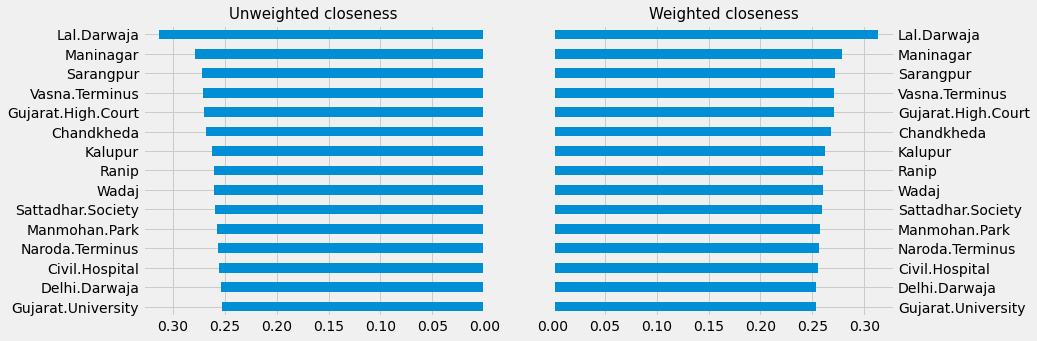

In [20]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))
plt.style.use('fivethirtyeight')

unweightedDF.sort_values(by='closeness', ascending=False)[:topNodes].plot(x='Label', y='closeness', kind='barh', ax=ax, legend=False).invert_yaxis()
ax.set_title("Unweighted closeness", fontsize=15)
ax.invert_xaxis()
ax.set_ylabel("")


weightedDF.sort_values(by='closeness', ascending=False)[:topNodes].plot(x='Label', y='closeness', kind='barh', ax=ax2, legend=False).invert_yaxis()
ax2.set_title("Weighted closeness", fontsize=15)
ax2.yaxis.tick_right()
ax2.set_ylabel("")


plt.show()

In [21]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Closeness'
adjusted_node_size = dict([(node, 5+closeness*15) for node, closeness in nx.closeness_centrality(G_pesato).items()])
nx.set_node_attributes(G_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("closeness","@closeness")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.closeness_centrality(G_pesato).values()), high=max(nx.closeness_centrality(G_pesato).values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")


save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Closeness.html'

# Eigenvector

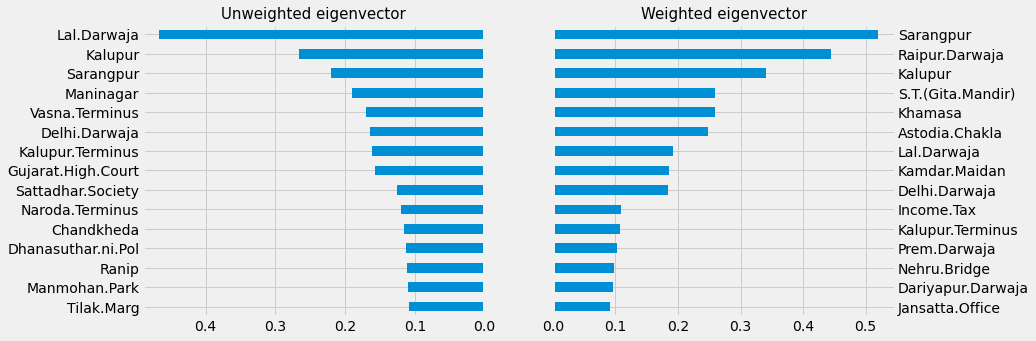

In [22]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))

plt.style.use('fivethirtyeight')

unweightedDF.sort_values(by='eigenvector', ascending=False)[:topNodes].plot(x='Label', y='eigenvector', kind='barh', ax=ax, legend=False).invert_yaxis()
ax.set_title("Unweighted eigenvector", fontsize=15)
ax.invert_xaxis()
ax.set_ylabel("")


weightedDF.sort_values(by='eigenvector', ascending=False)[:topNodes].plot(x='Label', y='eigenvector', kind='barh', ax=ax2, legend=False).invert_yaxis()
ax2.set_title("Weighted eigenvector", fontsize=15)
ax2.yaxis.tick_right()
ax2.set_ylabel("")


plt.show()

In [23]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Weighted Eigenvector'
adjusted_node_size = dict([(node, 5+eigenvector*175) for node, eigenvector in nx.eigenvector_centrality(G_pesato,weight="Weight").items()])
nx.set_node_attributes(G_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("eigenvector","@eigenvector")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.eigenvector_centrality(G_pesato,weight="Weight").values()), high=max(nx.eigenvector_centrality(G_pesato,weight="Weight").values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")


save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Weighted Eigenvector.html'

In [24]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Unweighted Eigenvector'
adjusted_node_size = dict([(node, 5+eigenvector*175) for node, eigenvector in nx.eigenvector_centrality(G_non_pesato).items()])
nx.set_node_attributes(G_non_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("eigenvector","@eigenvector")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_non_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.eigenvector_centrality(G_non_pesato).values()), high=max(nx.eigenvector_centrality(G_non_pesato).values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")


save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Unweighted Eigenvector.html'

# Page Rank

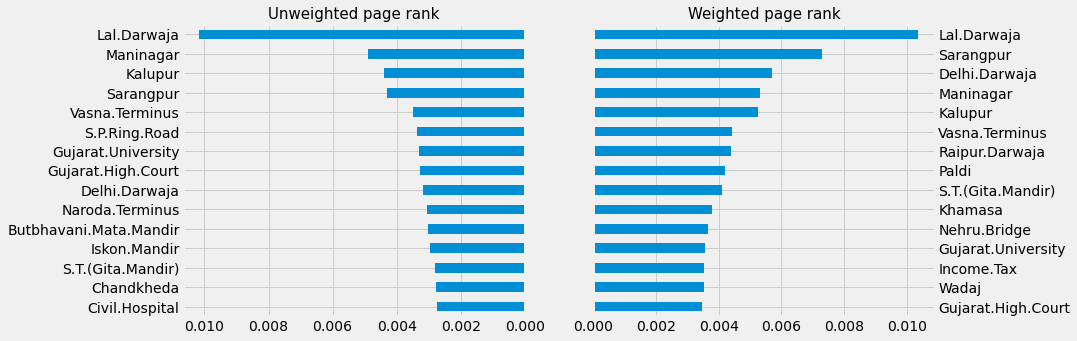

In [25]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))

plt.style.use('fivethirtyeight')

unweightedDF.sort_values(by='page_rank', ascending=False)[:topNodes].plot(x='Label', y='page_rank', kind='barh', ax=ax, legend=False).invert_yaxis()
ax.set_title("Unweighted page rank", fontsize=15)
ax.invert_xaxis()
ax.set_ylabel("")


weightedDF.sort_values(by='page_rank', ascending=False)[:topNodes].plot(x='Label', y='page_rank', kind='barh', ax=ax2, legend=False).invert_yaxis()
ax2.set_title("Weighted page rank", fontsize=15)
ax2.yaxis.tick_right()
ax2.set_ylabel("")


plt.show()

In [26]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Weighted Pagerank'
adjusted_node_size = dict([(node, 5+page_rank*350) for node, page_rank in nx.pagerank(G_pesato, weight="Weight").items()])
nx.set_node_attributes(G_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("page_rank","@page_rank")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.pagerank(G_pesato, weight="Weight").values()), high=max(nx.pagerank(G_pesato, weight="Weight").values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")
save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Weighted Pagerank.html'

In [27]:
if not os.path.isdir('img_abn'):             
    os.mkdir('img_abn')
title = 'Unweighted Pagerank'
adjusted_node_size = dict([(node, 5+page_rank*350) for node, page_rank in nx.pagerank(G_non_pesato).items()])
nx.set_node_attributes(G_pesato, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Viridis8

HOVER_TOOLTIPS = [("Label", "@index"),("page_rank","@page_rank")]

plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title,plot_height=900, 
            plot_width=1500)

network_graph = from_networkx(G_pesato, nx.spring_layout, scale=10, center=(0, 0))

minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))



#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

color_bar = ColorBar(
              color_mapper=LogColorMapper(palette="Viridis256", low=min(nx.pagerank(G_non_pesato).values()), high=max(nx.pagerank(G_non_pesato).values())), 
              label_standoff=12)

plot.add_layout(color_bar,"right")
save(plot, filename=f"img_abn{os.sep}{title}.html")

'c:\\Users\\fidan\\Social Network Analysis\\Progetto\\img_abn\\Unweighted Pagerank.html'

## Medium Scale

In [28]:
# Find k-cores 
G_pesato.remove_edges_from(nx.selfloop_edges(G_pesato))
G_core_3 = nx.k_core(G_pesato, 3)
G_core_4 = nx.k_core(G_pesato, 4)

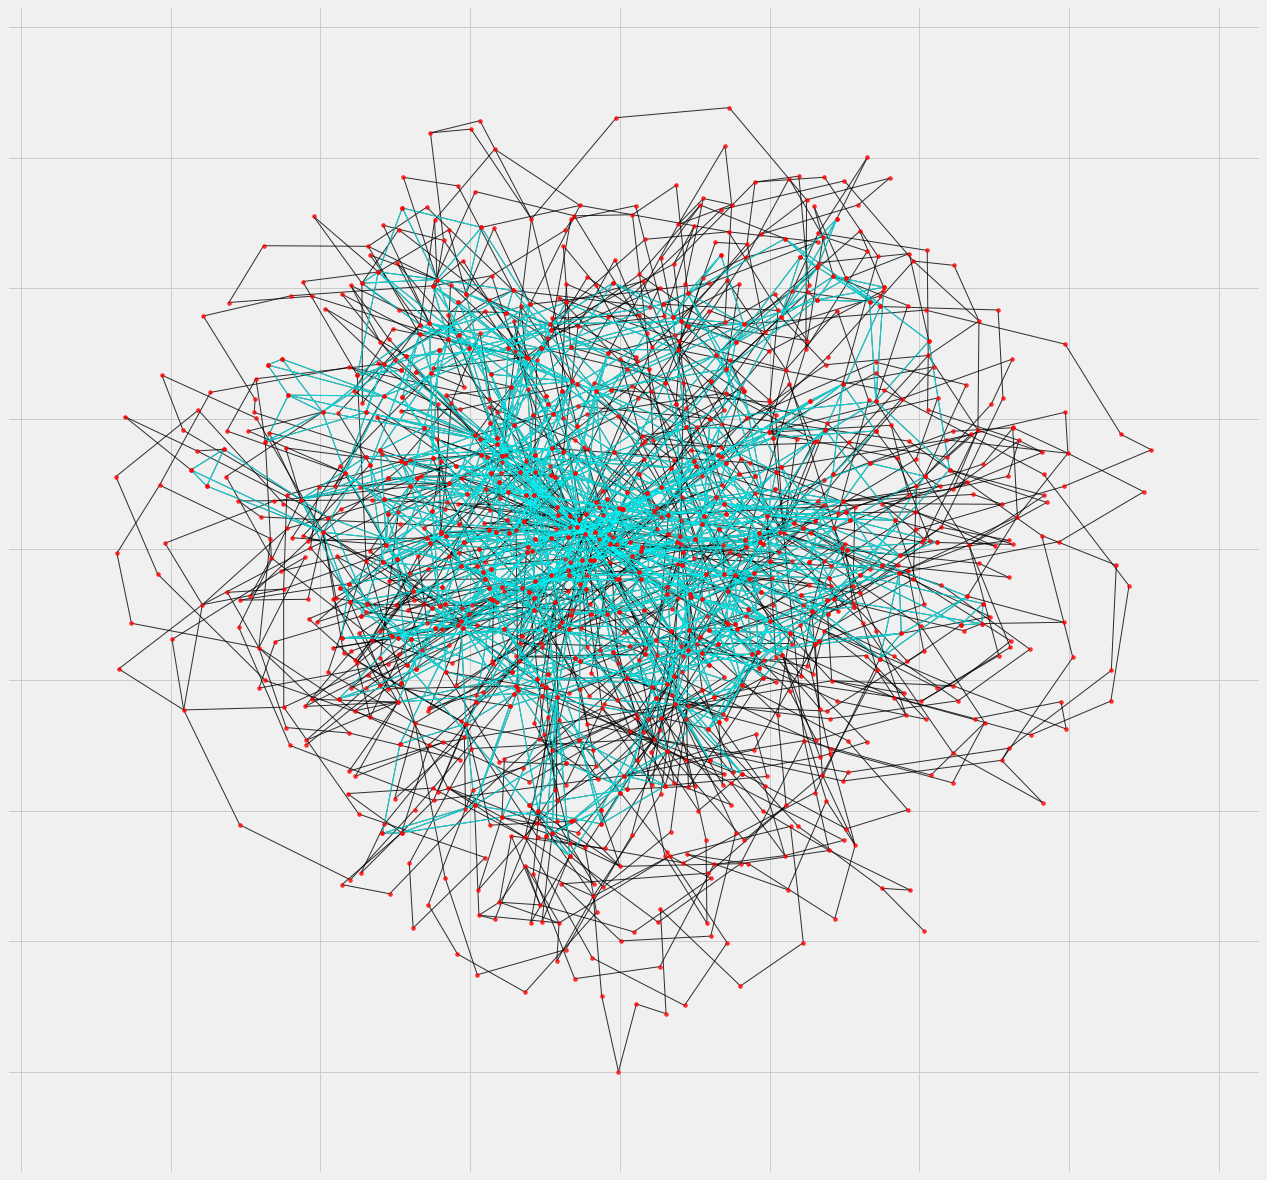

In [31]:
# grafico k kore = 3
nx.draw_networkx(
    G_pesato, pos=pos, node_size=15, edge_color="black", alpha=0.8, with_labels=False,node_color="red")
nx.draw_networkx(
    G_core_3, pos=pos, node_size=15, edge_color="cyan", alpha=0.8, with_labels=False,node_color="red")
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

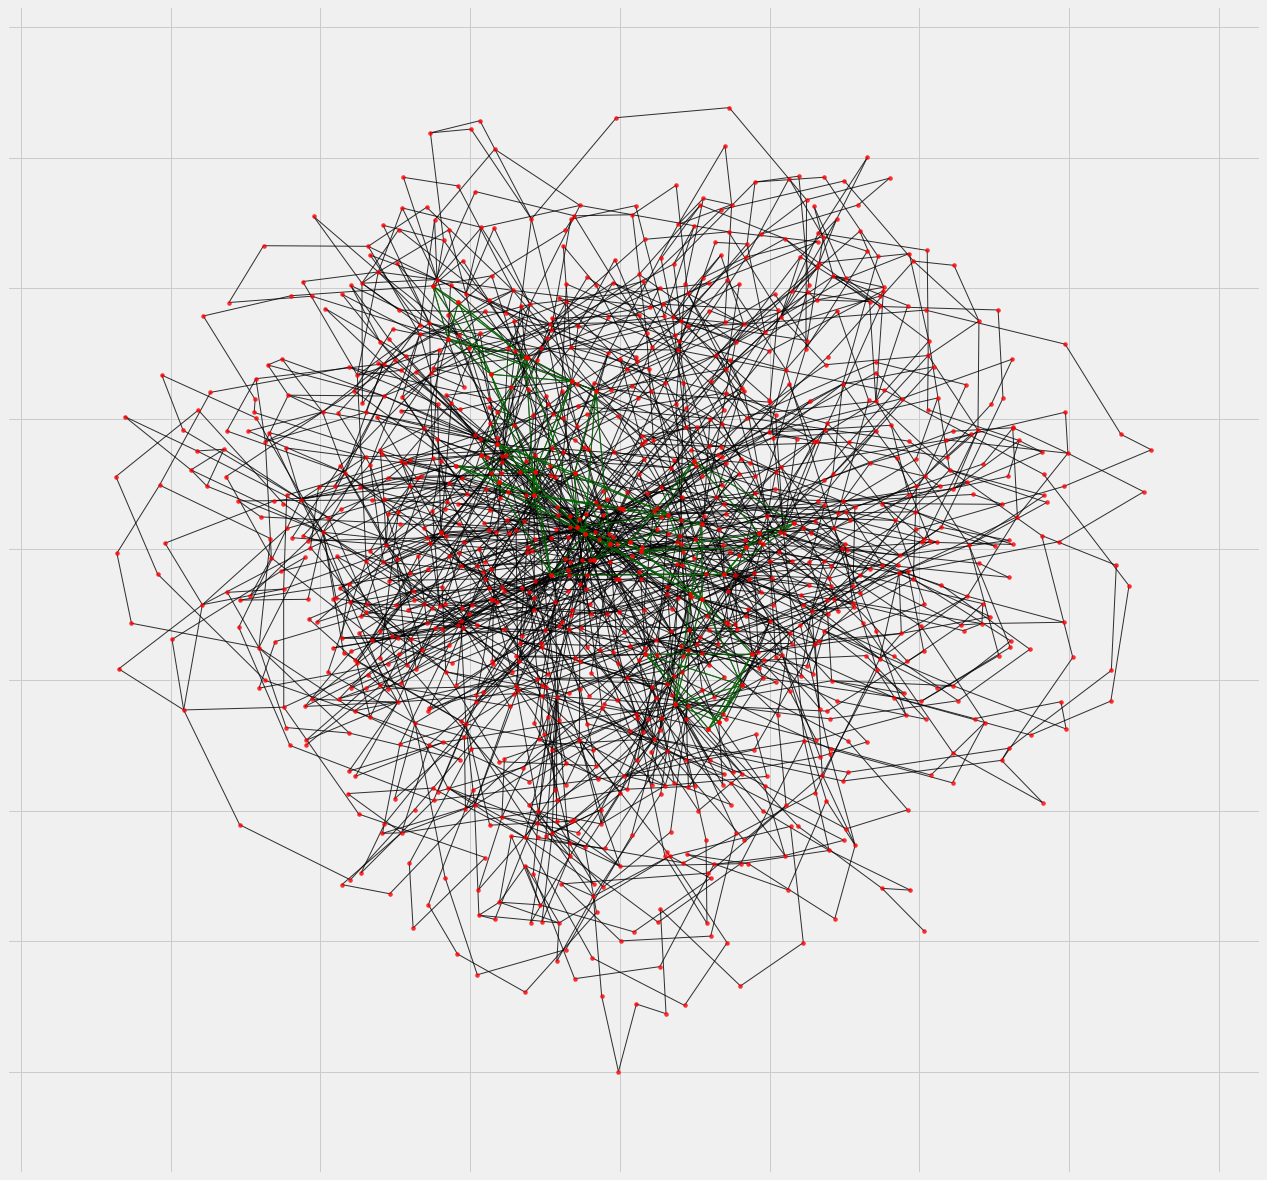

In [32]:
#grafico k kore = 4
nx.draw_networkx(
    G_pesato, pos=pos, node_size=15, edge_color="black", alpha=0.8, with_labels=False,node_color="red")
nx.draw_networkx(
    G_core_4, pos=pos, node_size=15, edge_color="green", alpha=0.8, with_labels=False,node_color="red")
plt.rcParams["figure.figsize"] = (20,20)

In [33]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

strength = dict(
    ((v,w), tie_strength(G_pesato, v, w))
    for v, w in G_pesato.edges())

def bridge_span(G):
    # Get list of edges
    edges = G.edges()
    # Copy G
    G = nx.Graph(G)
    # Create result dict
    result = dict()
    for v, w in edges:
        # Temporarily remove edge
        G.remove_edge(v, w)
        # Find distance with edge removed
        try:
            d = nx.shortest_path_length(G, v, w)
            result[(v, w)] = d
        except nx.NetworkXNoPath:
            result[(v, w)] = float('inf')
        # Restore edge
        G.add_edge(v, w)
    return result

span = bridge_span(G_pesato)

In [34]:
# edges ordinati per tie strength
ordered_edges = sorted(strength.items(), key=lambda x: x[1])
print('Edge\t  Strength\tSpan')

for e, edge_strength in ordered_edges:
    print('{}\t{}\t{}'.format(
        str(e), edge_strength, span[e]
    ))

Edge	  Strength	Span
('Lal.Darwaja', 'Bhadra')	1	4
('Lal.Darwaja', 'Khanpur')	1	4
('Lal.Darwaja', 'Ratan.Park')	1	5
('Lal.Darwaja', 'Chosar')	1	7
('Lal.Darwaja', 'Vivekanand.Nagar')	1	3
('Lal.Darwaja', 'Civil.Hospital')	1	3
('Lal.Darwaja', 'Kalapi.Nagar')	1	3
('Lal.Darwaja', 'Chandkheda.Gam')	1	3
('Lal.Darwaja', 'Gujarat.University')	1	3
('Lal.Darwaja', 'Mirzapur.Road')	1	3
('Lal.Darwaja', 'Makarba.Gam')	1	3
('Lal.Darwaja', 'Anand.Flats')	1	4
('Lal.Darwaja', 'Iskon.Mandir')	1	3
('Lal.Darwaja', 'Judges.Bunglow')	1	3
('Lal.Darwaja', 'Vaishnodevi.Mandir')	1	3
('Lal.Darwaja', 'Jodhpur.Gam')	1	3
('Lal.Darwaja', 'Ghuma.Gam')	1	3
('Lal.Darwaja', 'Vanch')	1	8
('Lal.Darwaja', 'Gatrad.Gam')	1	6
('Lal.Darwaja', 'Kamod.Gam')	1	3
('Lal.Darwaja', 'Sitarambapa.Chowk')	1	3
('Lal.Darwaja', 'Sardar.Park')	1	4
('Lal.Darwaja', 'Swami.Vivekanand.Bridge')	1	3
('Lal.Darwaja', 'Godhavi.Gam')	1	3
('Lal.Darwaja', 'Adinath.Nagar')	1	3
('Lal.Darwaja', 'Vijali.Ghar')	1	3
('Lal.Darwaja', 'Shilaj.Gam')	1	4
('Lal.Dar

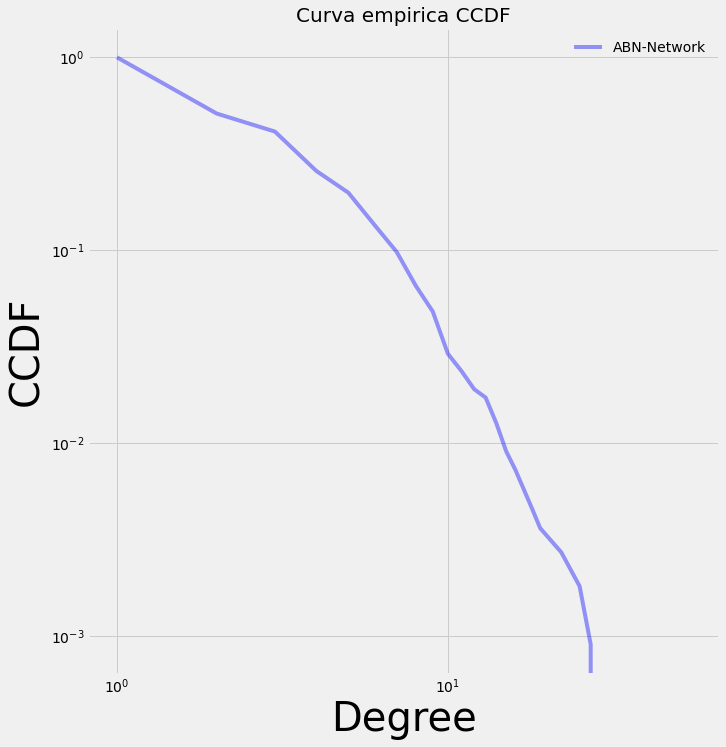

In [36]:
# grafico ccdf
degrees = [G_pesato.degree(u) for u in G_pesato]
plt.rcParams["figure.figsize"] = (10,10)

cdf = Cdf.from_seq(degrees, name='distribution')
(1 - cdf).plot(color='b', alpha=0.4, label="ABN-Network")
decorate(xlabel='Degree', xscale='log',
                 ylabel='CCDF', yscale='log')

plt.xlabel("Degree",fontsize=40)
plt.ylabel("CCDF",fontsize=40)
plt.title("Curva empirica CCDF", fontsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.show()


# Random Network Erdos-Renyi

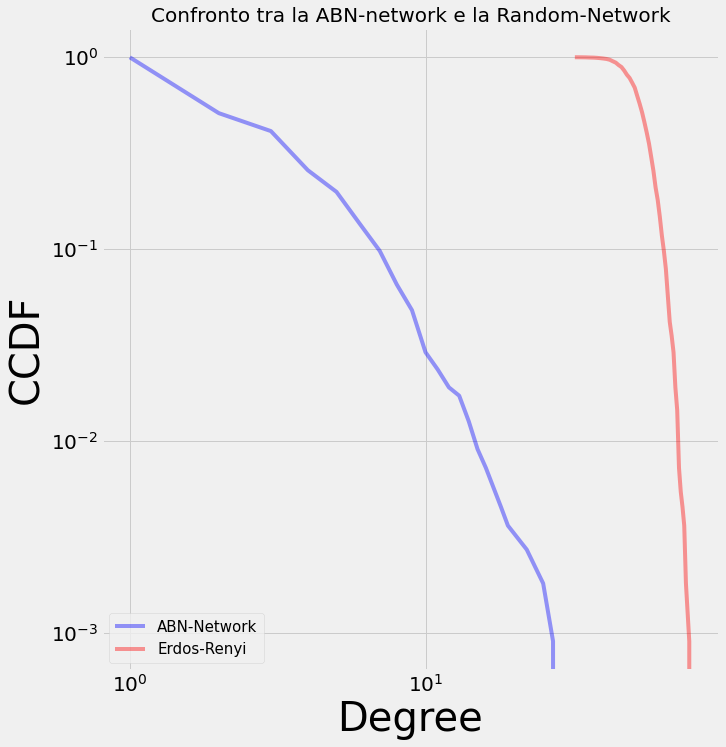

Average degree Random Network: 54.97733454215775
Average degree ABN Network: 3.898458748866727
Il global clustering della network ABN è:  0.127
Il global clustering della random network è:  0.05
L'APL della network ABN è:  6.463
L'APL della random network è:  2.011


In [37]:
erdos_renyi=nx.erdos_renyi_graph(len(G_pesato),0.05,seed=1)
degrees_er = [erdos_renyi.degree(i) for i in erdos_renyi]
plt.rcParams["figure.figsize"] = (10,10)

cdf = Cdf.from_seq(degrees, name='distribution')
(1 - cdf).plot(color='b', alpha=0.4, xlabel='Degree', ylabel="CCDF", label="ABN-Network")


cdf = Cdf.from_seq(degrees_er, name='distribution')
(1 - cdf).plot(color='r', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="Erdos-Renyi")

decorate(xlabel='Degree', xscale='log',
                 ylabel='CCDF', yscale='log')
                 
plt.xlabel("Degree",fontsize=40)
plt.ylabel("CCDF",fontsize=40)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title("Confronto tra la ABN-network e la Random-Network", fontsize=20)
plt.legend(fontsize=15)
plt.show()

print("Average degree Random Network:",sum(dict(erdos_renyi.degree()).values())/len(erdos_renyi))
print("Average degree ABN Network:",sum(dict(G_pesato.degree()).values())/len(G_pesato))
print("Il global clustering della network ABN è: ",(round(nx.transitivity(G_pesato),3)))
print("Il global clustering della random network è: ",(round(nx.transitivity(erdos_renyi),3)))
print("L'APL della network ABN è: ",(round(nx.average_shortest_path_length(G_pesato, weight="Weight"),3)))
print("L'APL della random network è: ",(round(nx.average_shortest_path_length(erdos_renyi),3)))


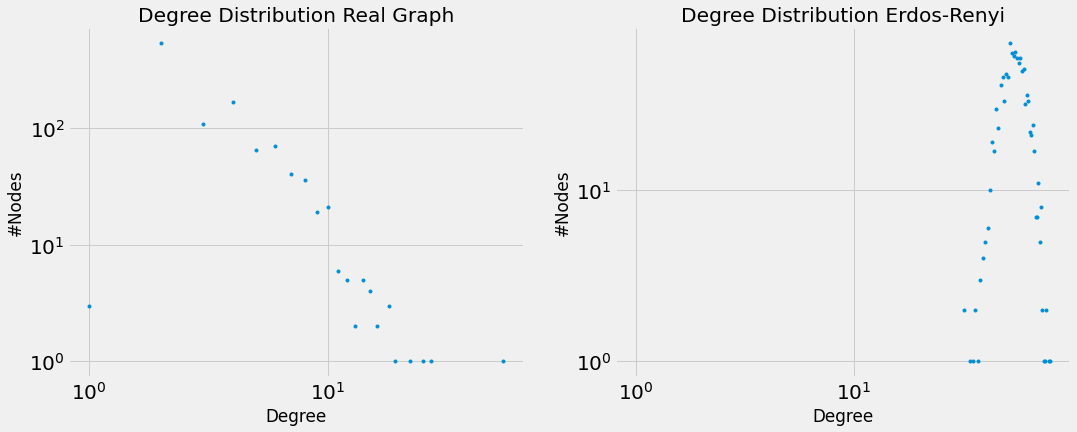

In [39]:
hist_1 = nx.degree_histogram(G_pesato)
hist = nx.degree_histogram(erdos_renyi)

fig = plt.figure(figsize=(16, 6)) 
plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist_1)), hist_1, ".")
plt.title("Degree Distribution Real Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Erdos-Renyi")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()




# Small word Watts-Strogatz

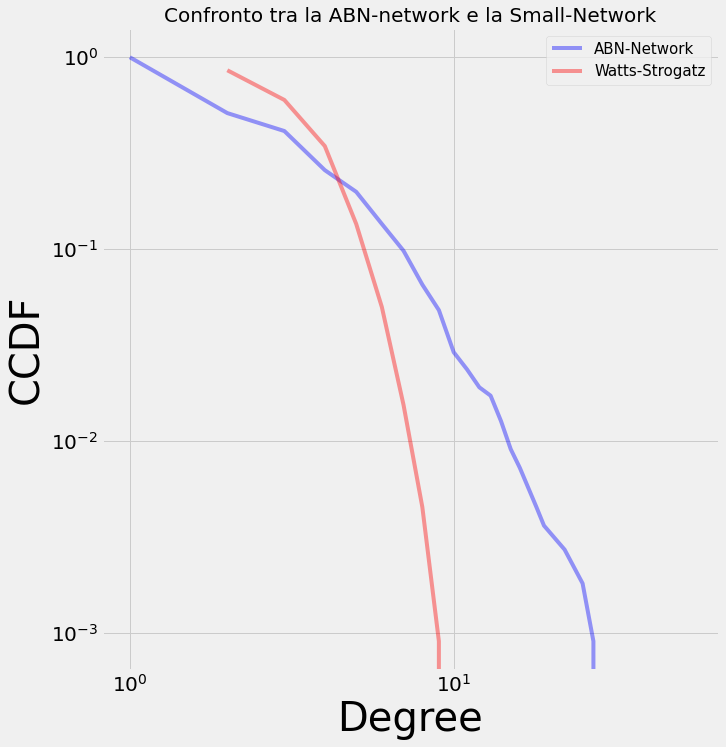

Average degree Small word: 4.0
Average degree ABN Network: 3.898458748866727
Il global clustering della network ABN è:  0.127
Il global clustering della Small word network è:  0.002
L'APL della network ABN è:  6.463
L'APL della small word network è:  5.403


In [40]:
watts_strogatz = nx.watts_strogatz_graph(len(G_pesato.nodes), int(round(2*len(G_pesato.edges())/len(G_pesato))), 1, seed=1)
degrees_ws = [watts_strogatz.degree(i) for i in watts_strogatz]
plt.rcParams["figure.figsize"] = (10,10)

cdf = Cdf.from_seq(degrees, name='distribution')
(1 - cdf).plot(color='b', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="ABN-Network")


cdf = Cdf.from_seq(degrees_ws, name='distribution')
(1 - cdf).plot(color='r', alpha=0.4,xlabel='Degree',ylabel="CCDF",label="Watts-Strogatz")

decorate(xlabel='Degree', xscale='log',
                 ylabel='CCDF', yscale='log')

plt.xlabel("Degree",fontsize=40)
plt.ylabel("CCDF",fontsize=40)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title("Confronto tra la ABN-network e la Small-Network", fontsize=20)
plt.legend(fontsize=15)
plt.show()

print("Average degree Small word:",sum(dict(watts_strogatz.degree()).values())/len(watts_strogatz))
print("Average degree ABN Network:",sum(dict(G_pesato.degree()).values())/len(G_pesato))
print("Il global clustering della network ABN è: ",(round(nx.transitivity(G_pesato),3)))
print("Il global clustering della Small word network è: ",(round(nx.transitivity(watts_strogatz),3)))
print("L'APL della network ABN è: ",(round(nx.average_shortest_path_length(G_pesato, weight="Weight"),3)))
print("L'APL della small word network è: ",(round(nx.average_shortest_path_length(watts_strogatz),3)))

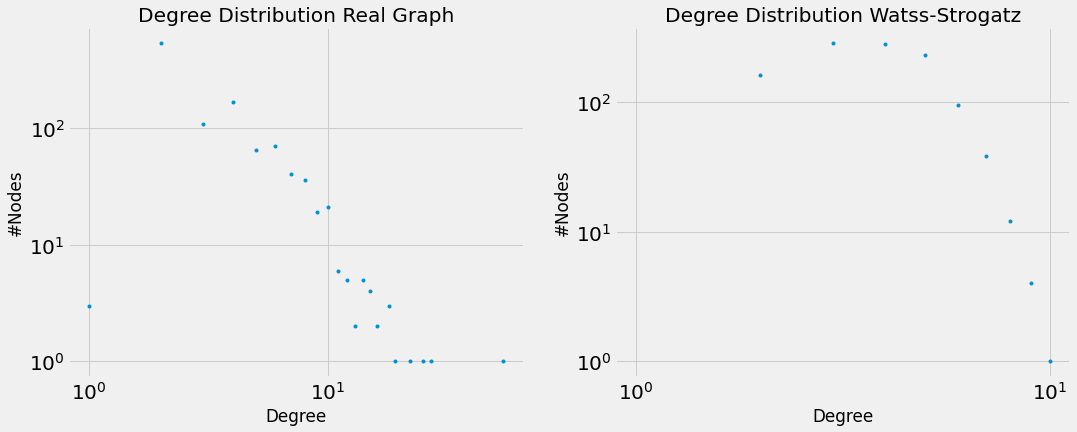

In [42]:
hist_1 = nx.degree_histogram(G_pesato)
hist = nx.degree_histogram(watts_strogatz)

fig = plt.figure(figsize=(16, 6)) 
plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist_1)), hist_1, ".")
plt.title("Degree Distribution Real Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Watss-Strogatz")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

# Barabasi Albert

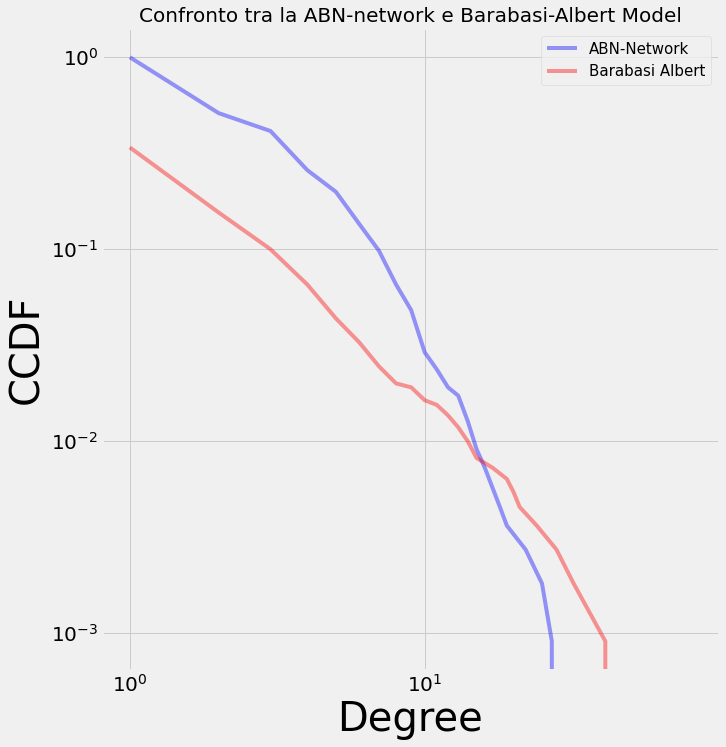

Average degree Barabasi-Albert: 1.99818676337262
Average degree ABN Network: 3.898458748866727
Il global clustering della network ABN è:  0.127
Il global clustering del modello di Barabasi-Albert è:  0
L'APL della network ABN è:  6.463
L'APL del modello di Barabasi- Albert è:  7.049


In [41]:
barabasi = nx.barabasi_albert_graph(len(G_pesato.nodes), 1,seed=1)
degrees_barabasi = [barabasi.degree(i) for i in barabasi]
plt.rcParams["figure.figsize"] = (10,10)

cdf = Cdf.from_seq(degrees, name='distribution')
(1 - cdf).plot(color='b', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="ABN-Network")


cdf = Cdf.from_seq(degrees_barabasi, name='distribution')
(1 - cdf).plot(color='r', alpha=0.4,xlabel='Degree',ylabel="CCDF",label="Barabasi Albert")

decorate(xlabel='Degree', xscale='log',
                 ylabel='CCDF', yscale='log')
                 
plt.xlabel("Degree",fontsize=40)
plt.ylabel("CCDF",fontsize=40)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title("Confronto tra la ABN-network e Barabasi-Albert Model", fontsize=20)
plt.legend(fontsize=15)
plt.show()

print("Average degree Barabasi-Albert:",sum(dict(barabasi.degree()).values())/len(barabasi))
print("Average degree ABN Network:",sum(dict(G_pesato.degree()).values())/len(G_pesato))
print("Il global clustering della network ABN è: ",(round(nx.transitivity(G_pesato),3)))
print("Il global clustering del modello di Barabasi-Albert è: ",(round(nx.transitivity(barabasi),3)))
print("L'APL della network ABN è: ",(round(nx.average_shortest_path_length(G_pesato, weight="Weight"),3)))
print("L'APL del modello di Barabasi- Albert è: ",(round(nx.average_shortest_path_length(barabasi),3)))

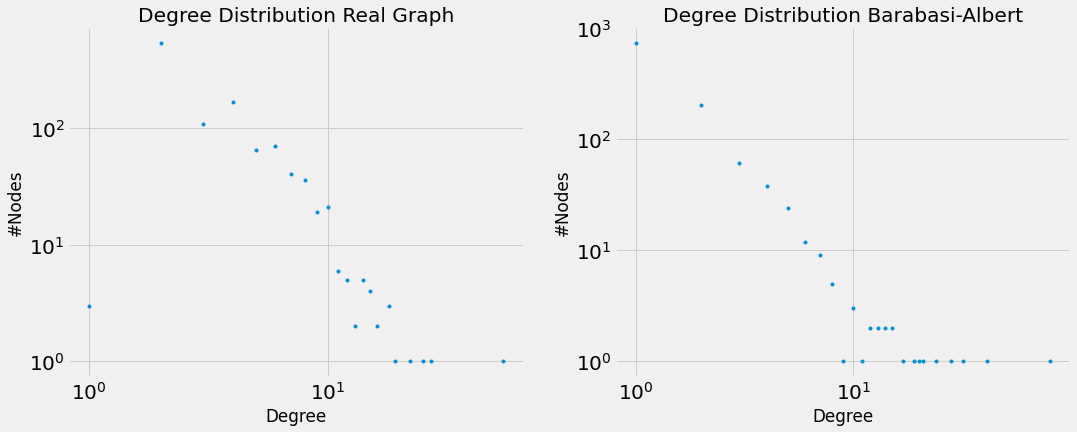

In [43]:
hist_1 = nx.degree_histogram(G_pesato)
hist = nx.degree_histogram(barabasi)

fig = plt.figure(figsize=(16, 6)) 
plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist_1)), hist_1, ".")
plt.title("Degree Distribution Real Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Barabasi-Albert")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

# Confronto tra i vari modelli della CCDF

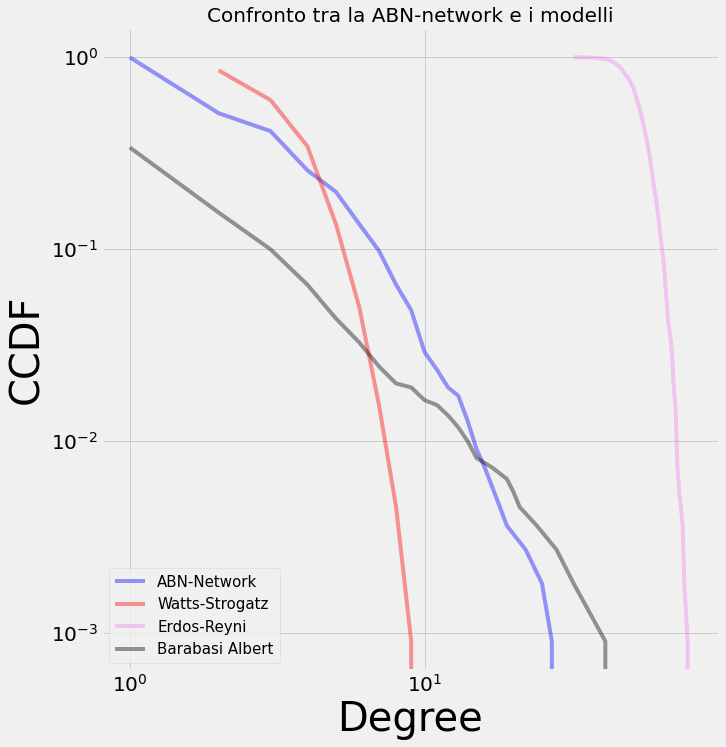

In [45]:
plt.rcParams["figure.figsize"] = (10,10)

cdf = Cdf.from_seq(degrees, name='distribution')
(1 - cdf).plot(color='b', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="ABN-Network")

cdf = Cdf.from_seq(degrees_ws, name='distribution')
(1 - cdf).plot(color='r', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="Watts-Strogatz")

cdf = Cdf.from_seq(degrees_er, name='distribution')
(1 - cdf).plot(color='violet', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="Erdos-Reyni")

cdf = Cdf.from_seq(degrees_barabasi, name='distribution')
(1 - cdf).plot(color='black', alpha=0.4,xlabel='Degree',ylabel="CCDF", label="Barabasi Albert")

decorate(xlabel='Degree', xscale='log',
                 ylabel='CCDF', yscale='log')
plt.legend(["ABN-Network","Watts-Strogatz","Erdos-Renyi","Barabasi-Albert"])
plt.title("Confronto tra la ABN-network e i modelli", fontsize=20)
plt.xlabel("Degree",fontsize=40)
plt.ylabel("CCDF",fontsize=40)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.legend(fontsize=15)
plt.show()
